# Метод имитации отжига: задача о N ферзях

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def queens(N):
    np.random.seed(33412)
    ver = np.arange(1, N + 1)
    hor = np.arange(1, N + 1)
    np.random.shuffle(hor)
    return np.column_stack((ver, hor)) # получаем массив
    # размерности (N, 2), отождествляющий расположение ферзей на доске N x N

In [3]:
matrix = queens(25)
matrix

array([[ 1, 16],
       [ 2,  5],
       [ 3,  3],
       [ 4, 12],
       [ 5,  2],
       [ 6, 24],
       [ 7,  9],
       [ 8,  8],
       [ 9, 13],
       [10, 17],
       [11,  4],
       [12, 11],
       [13,  1],
       [14, 10],
       [15, 20],
       [16, 22],
       [17,  6],
       [18, 23],
       [19, 14],
       [20, 25],
       [21,  7],
       [22, 15],
       [23, 19],
       [24, 21],
       [25, 18]])

In [4]:
def F(Q, N): # Q означает расположение ферзей
    cnt = 0
    for i in range(N):
        for j in range(i + 1, N):
            if abs(Q[i, 0] - Q[j, 0]) == abs(Q[i, 1] - Q[j, 1]): 
                cnt += 1
    return cnt * 2 # учитываем взаимные атаки

In [5]:
def G(Q, N):
    pos = Q.copy()
    while True:
        i = np.random.randint(0, N - 1)
        j = np.random.randint(0, N - 1)
    
        if i != j:
            break
            
    pos[i, 1], pos[j, 1] = pos[j, 1], pos[i, 1]
    return pos # получаем новое расположение ферзей

In [6]:
F(matrix, matrix.shape[0])

30

In [7]:
def SA(Q, T, schedule):
    N = np.shape(Q)[0] 
    x_hat = Q.copy() 
    while F(x_hat, N) != 0:
        x_tilda = G(x_hat, N)
        delta = F(x_tilda, N) - F(x_hat, N)
        prob = np.exp(- delta / T)
        
        if (delta < 0) or (prob >= np.random.random()):
            x_hat = x_tilda
        
        T *= schedule 
    
    return x_hat

Тогда одно из оптимальных решений выглядит следующим образом.

In [8]:
SA(matrix, 100, 0.95)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


array([[ 1,  5],
       [ 2, 15],
       [ 3, 20],
       [ 4,  7],
       [ 5, 14],
       [ 6,  2],
       [ 7, 17],
       [ 8, 22],
       [ 9,  3],
       [10, 12],
       [11,  9],
       [12, 13],
       [13, 25],
       [14,  4],
       [15,  1],
       [16, 21],
       [17, 16],
       [18, 24],
       [19, 10],
       [20,  8],
       [21,  6],
       [22, 19],
       [23, 23],
       [24, 11],
       [25, 18]])

### Дополнительно

In [9]:
%timeit SA(matrix, 100, 0.95)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


The slowest run took 14.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1.01 s ± 651 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


__N = 8__

In [10]:
matrix = queens(8)
matrix

array([[1, 1],
       [2, 6],
       [3, 4],
       [4, 7],
       [5, 8],
       [6, 3],
       [7, 5],
       [8, 2]])

In [11]:
F(matrix, 8)

2

In [12]:
def SA_adj(Q, T, schedule):
    lst = list()              
    N = np.shape(Q)[0] 
    x_hat = Q.copy() 
    lst.append(F(x_hat, N))
    while F(x_hat, N) != 0:
        x_tilda = G(x_hat, N)
        delta = F(x_tilda, N) - F(x_hat, N)
        prob = np.exp(- delta / T)
        
        if (delta < 0) or (prob >= np.random.random()):
            x_hat = x_tilda
            lst.append(F(x_hat, N))
        
        T *= schedule 
    
    return lst

In [13]:
a_matrix = matrix.copy()
b_matrix = matrix.copy()
c_matrix = matrix.copy()

In [14]:
a = SA_adj(a_matrix, 100, 0.9)

In [15]:
b = SA_adj(a_matrix, 100, 0.8)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [16]:
c = SA_adj(a_matrix, 100, 0.7)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


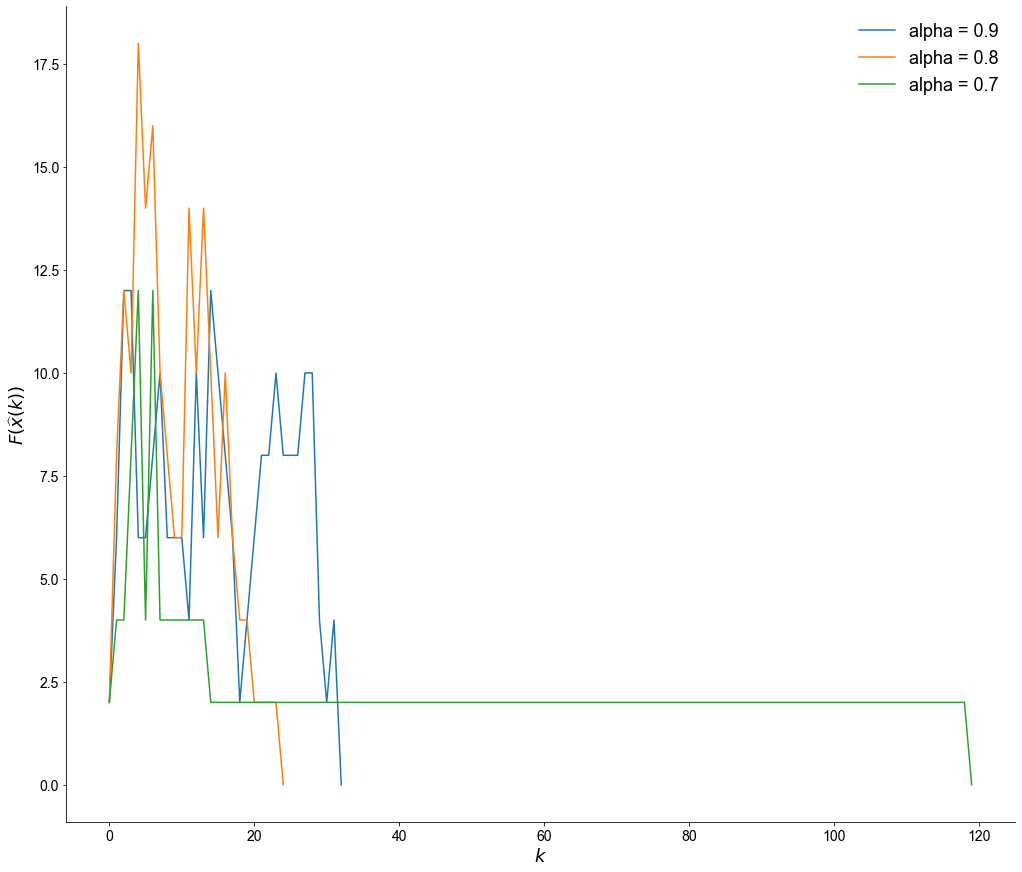

In [17]:
f = plt.figure(figsize=(17, 15))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("$k$", fontsize=18)  
plt.ylabel("$F(\widehat{x}(k))$", fontsize=18) 

plt.plot(a, label="alpha = 0.9") 
plt.plot(b, label="alpha = 0.8")
plt.plot(c, label="alpha = 0.7") 
plt.legend(frameon=False, fontsize=18) 

sns.set()
sns.set_style("white")

In [125]:
f.savefig("queens8.png", bbox_inches='tight', dpi=600)

__N = 25__

In [18]:
matrix = queens(25)
matrix

array([[ 1, 16],
       [ 2,  5],
       [ 3,  3],
       [ 4, 12],
       [ 5,  2],
       [ 6, 24],
       [ 7,  9],
       [ 8,  8],
       [ 9, 13],
       [10, 17],
       [11,  4],
       [12, 11],
       [13,  1],
       [14, 10],
       [15, 20],
       [16, 22],
       [17,  6],
       [18, 23],
       [19, 14],
       [20, 25],
       [21,  7],
       [22, 15],
       [23, 19],
       [24, 21],
       [25, 18]])

In [19]:
d_matrix = matrix.copy()
e_matrix = matrix.copy()
z_matrix = matrix.copy()

In [20]:
d = SA_adj(a_matrix, 100, 0.9)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [21]:
e = SA_adj(a_matrix, 100, 0.8)

In [22]:
z = SA_adj(a_matrix, 100, 0.7)

/Users/khaykingleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


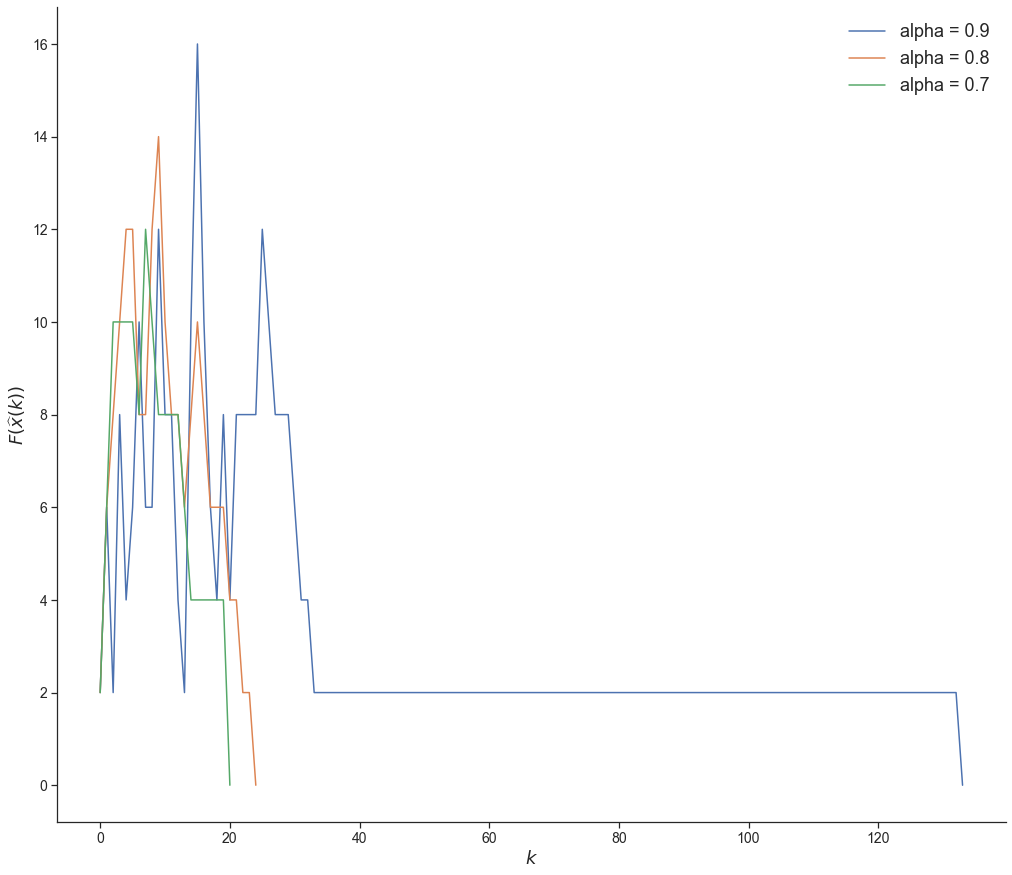

In [23]:
f = plt.figure(figsize=(17, 15))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("$k$", fontsize=18)  
plt.ylabel("$F(\widehat{x}(k))$", fontsize=18) 

plt.plot(d, label="alpha = 0.9") 
plt.plot(e, label="alpha = 0.8")
plt.plot(z, label="alpha = 0.7") 
plt.legend(frameon=False, fontsize=18) 

sns.set()
sns.set_style("white")

In [139]:
f.savefig("queens25.png", bbox_inches='tight', dpi=600)